In [1]:
import matplotlib

import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
def qr(r0,a,b,c,t,D):
	return r0*np.exp(-qbarrier(t,a,b,c)/D)
def snr(r0p,r0m,ap,am,bp,bm,cp,cm,t,D,av,v0):
	return (qr(r0m,am,bm,cm,t,D)*(qr(r0p,ap,bp,cp,t,D)+qr(r0m,am,bm,cm,t,D))/(v0**2*qr(r0p,ap,bp,cp,t,D)))*((((2*ap*t+bp)-(2*am*t+bm))*qr(r0p,ap,bp,cp,t,D)*v0)/(D*(qr(r0p,ap,bp,cp,t,D)+qr(r0m,am,bm,cm,t,D)))+av)**2
def qbarrier(x,a,b,c):
	return a*x**2+b*x+c
def func(x, a, b):
	return a * np.exp(-b * x)

In [5]:
date3='realfast11jjem2sh'
date2='realfast19jjem2st'

ivalues=20
l=5
D1=[35]
D3=[40,50]
D2=[45]
Dvar=[30]
D=D1+D2+D3+Dvar
Da=np.array(D)
btoeq=np.zeros((l,ivalues))
eqtob=np.zeros((l,ivalues))
params=np.zeros((4,ivalues))
paramsq=np.zeros(6)
for k2 in range(0,ivalues):
	x=[]
	ratefile = open('/home/richard/mastergit/pythonplots/arrhenius_analytics/rate%s%d.txt' %('new'+date3+'new'+date2,k2),'r')
	for k4 in ratefile:
		row=k4.split()
		x.append(float(row[0]))
	ax=np.array(x)
	for k in range(0,l):
		btoeq[k][k2]=1/ax[k]
		eqtob[k][k2]=1/ax[k+l]


In [6]:
av=0.013
v0=0.0637
xs=np.zeros(l)
for b in range(0,l):
	xs[b]=100/Da[b]
for k2 in range(0,ivalues):
	popt,pcov = curve_fit(func, xs, btoeq[:,k2])
	params[0][k2]=popt[0]
	params[1][k2]=popt[1]
	popt,pcov = curve_fit(func, xs, eqtob[:,k2])
	params[2][k2]=popt[0]
	params[3][k2]=popt[1]
rbte=np.mean(params[0,:])
retb=np.mean(params[2,:])

istart=1	
xnew=np.arange(-5+istart,-5+istart+ivalues)*0.02

popt,pcov = curve_fit(qbarrier, xnew, params[1,:])
paramsq[0]=popt[0]
paramsq[1]=popt[1]
paramsq[2]=popt[2]
popt,pcov = curve_fit(qbarrier, xnew, params[3,:])
paramsq[3]=popt[0]
paramsq[4]=popt[1]
paramsq[5]=popt[2]

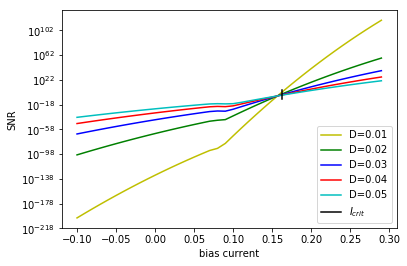

In [20]:
vec=np.linspace(1,5,num=5,endpoint=True)
lvec=len(vec)
Int=0.01
Dv=vec*Int
plt.figure()
plt.xlabel('bias current')
plt.ylabel('SNR')
t=np.arange(-0.1,0.3,0.01)
plt.yscale('log')
colorv=['y','g','b','r','c']
for n in range(0,lvec):	
	plt.plot(t,snr(rbte,retb,paramsq[0],paramsq[3],paramsq[1],paramsq[4],paramsq[2],paramsq[5],t,Dv[n],av,v0)/8,colorv[n],label='D=%.2f' %Dv[n])
plt.plot([0.163, 0.163], [2*10**(-10), 10**6], color='black', linestyle='-',label='$I_{crit}$')
plt.legend()
#plt.savefig('snrquatheo.pdf')